Dataset head:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       

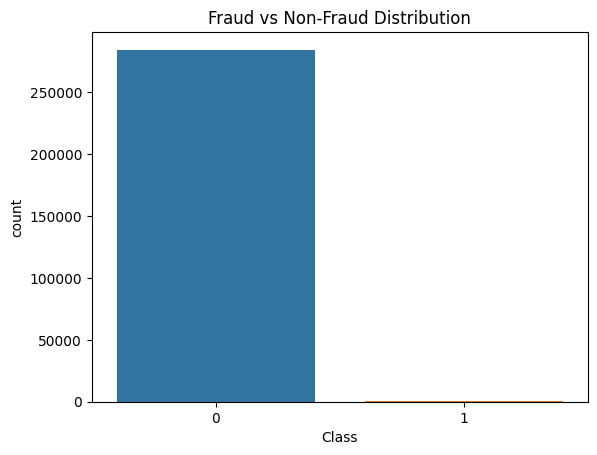

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


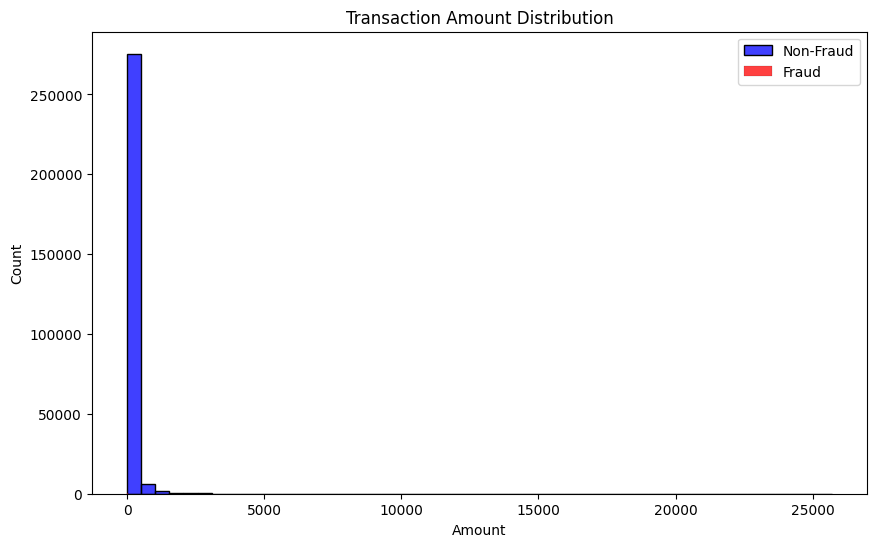

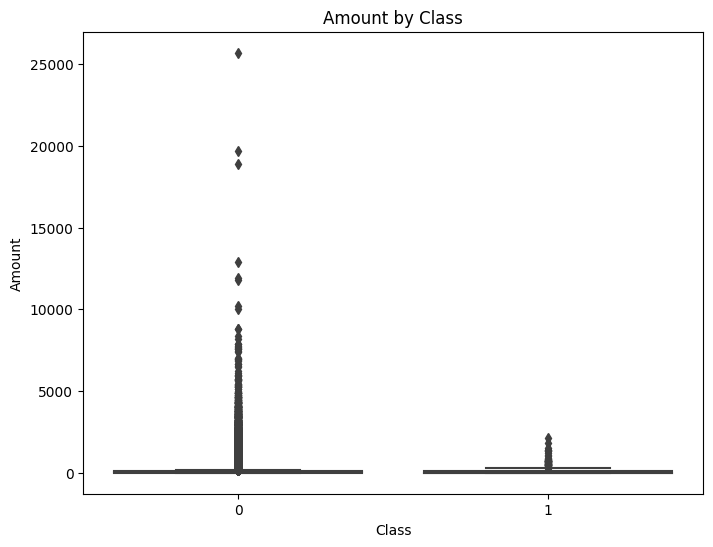

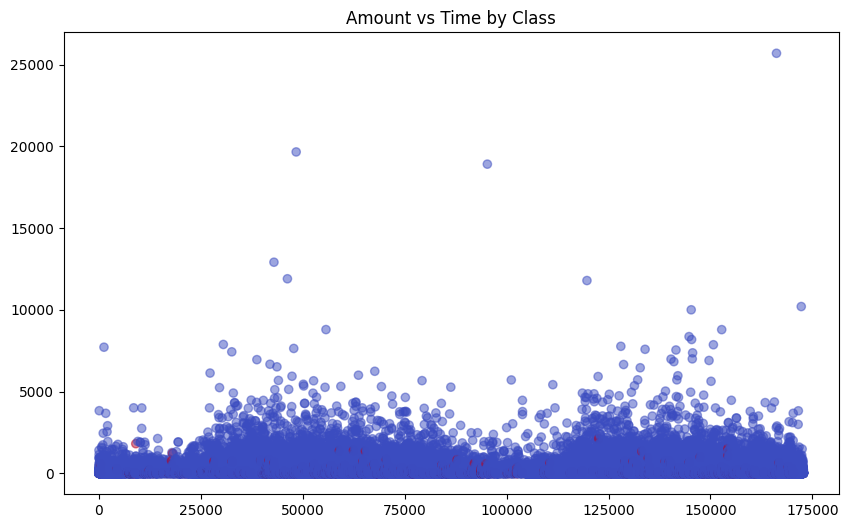

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.33      0.34      0.33        98

    accuracy                           1.00     56962
   macro avg       0.66      0.67      0.67     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.6677782220091187


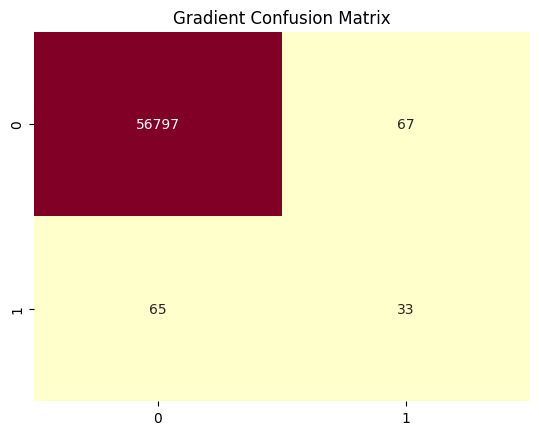

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


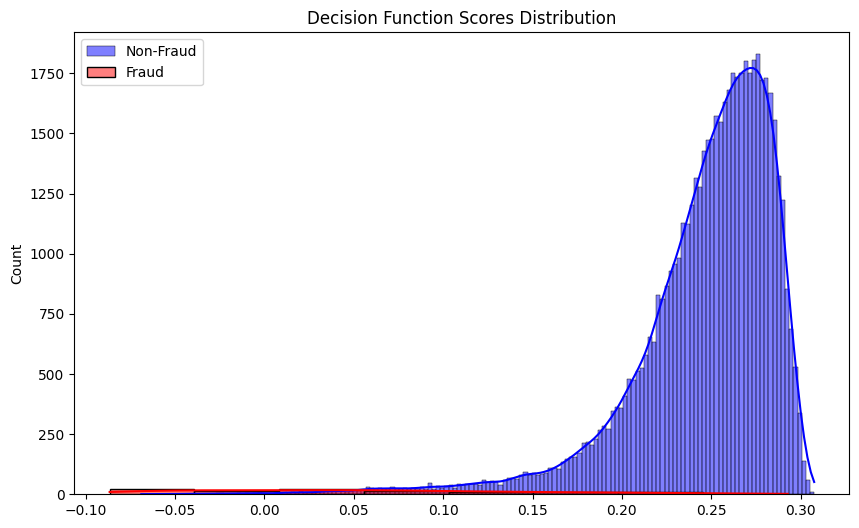

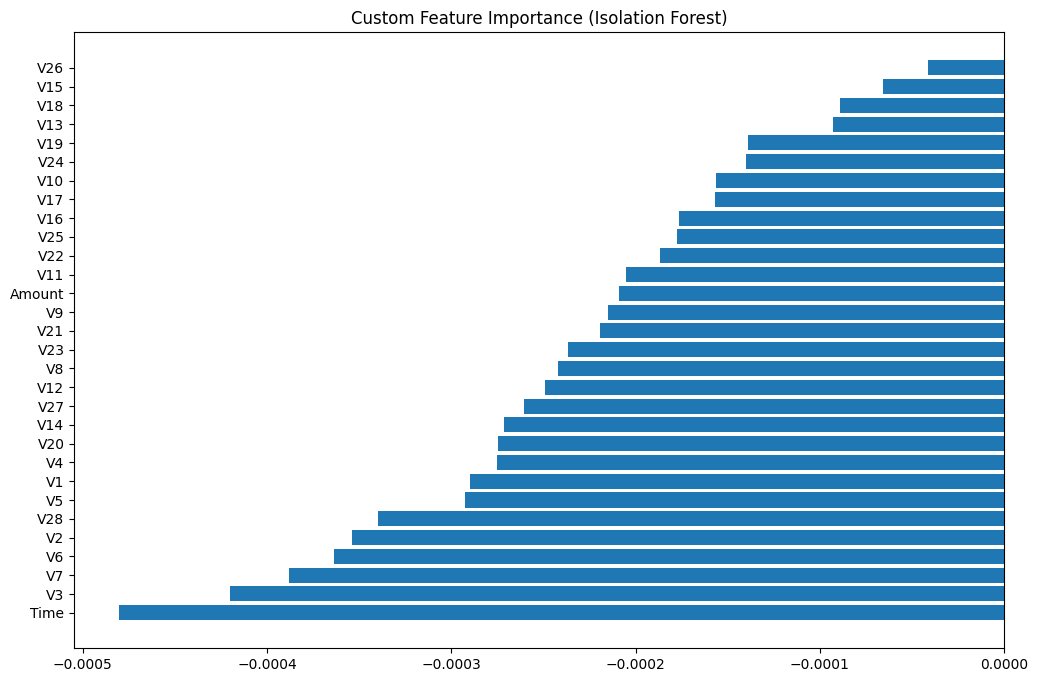

In [1]:
# Credit Card Fraud Detection

## Introduction
### This notebook demonstrates fraud detection using Isolation Forest, focusing on imbalanced data. We explore EDA, modeling, and evaluation for actionable insights in financial security.

## Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Loading and Exploration

### Load Data
# Path in Kaggle
data_path = '/kaggle/input/creditcardfraud/creditcard.csv'
if not os.path.exists(data_path):
    print("Error: File not found. Check available files:")
    for dirname, _, filenames in os.walk('/kaggle/input'):
        for filename in filenames:
            print(os.path.join(dirname, filename))
    raise FileNotFoundError("Adjust the path to match the correct dataset file.")

transactions = pd.read_csv(data_path)
print("Dataset head:")
print(transactions.head())

print("\nClass distribution:")
print(transactions['Class'].value_counts())

### Initial EDA
# Class distribution plot
sns.countplot(x='Class', data=transactions)
plt.title('Fraud vs Non-Fraud Distribution')
plt.savefig('/kaggle/working/class_distribution.png')
plt.show()

# Amount distribution
plt.figure(figsize=(10,6))
sns.histplot(transactions[transactions['Class']==0]['Amount'], bins=50, color='blue', label='Non-Fraud')
sns.histplot(transactions[transactions['Class']==1]['Amount'], bins=50, color='red', label='Fraud')
plt.legend()
plt.title('Transaction Amount Distribution')
plt.savefig('/kaggle/working/amount_distribution.png')
plt.show()

# Boxplot of Amount by Class
plt.figure(figsize=(8,6))
sns.boxplot(x='Class', y='Amount', data=transactions)
plt.title('Amount by Class')
plt.savefig('/kaggle/working/amount_boxplot.png')
plt.show()

# Scatter plot of Amount vs Time
plt.figure(figsize=(10,6))
plt.scatter(transactions['Time'], transactions['Amount'], c=transactions['Class'], cmap='coolwarm', alpha=0.5)
plt.title('Amount vs Time by Class')
plt.savefig('/kaggle/working/scatter_amount_time.png')
plt.show()

## Data Preprocessing
features = transactions.drop('Class', axis=1)
labels = transactions['Class']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

## Model Building and Training
detector = IsolationForest(contamination=0.00172, random_state=42)
detector.fit(X_train)

## Model Evaluation
# Predictions
y_pred_test = detector.predict(X_test)
y_pred_test = np.where(y_pred_test == -1, 1, 0)  # Convert to 0/1

print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

print('ROC-AUC:', roc_auc_score(y_test, y_pred_test))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd', cbar=False)
plt.title('Gradient Confusion Matrix')
plt.savefig('/kaggle/working/confusion_matrix.png')
plt.show()

# Decision Scores Distribution
scores = detector.decision_function(X_test)
plt.figure(figsize=(10,6))
sns.histplot(scores[y_test==0], color='blue', label='Non-Fraud', kde=True)
sns.histplot(scores[y_test==1], color='red', label='Fraud', kde=True)
plt.legend()
plt.title('Decision Function Scores Distribution')
plt.savefig('/kaggle/working/decision_scores.png')
plt.show()

## Custom Feature Importance
# Calculate feature importance using changes in decision scores
feature_importance = []
baseline_scores = detector.decision_function(X_test)
baseline_mse = np.mean((baseline_scores - y_test)**2)

for col in X_test.columns:
    X_test_permuted = X_test.copy()
    X_test_permuted[col] = np.random.permutation(X_test_permuted[col].values)  # Permute one feature
    permuted_scores = detector.decision_function(X_test_permuted)
    permuted_mse = np.mean((permuted_scores - y_test)**2)
    importance = permuted_mse - baseline_mse
    feature_importance.append(importance)

# Plot Feature Importance
plt.figure(figsize=(12,8))
sorted_idx = np.argsort(feature_importance)
plt.barh(X_test.columns[sorted_idx], np.array(feature_importance)[sorted_idx])
plt.title('Custom Feature Importance (Isolation Forest)')
plt.savefig('/kaggle/working/feature_importance.png')
plt.show()

## Model Saving
import joblib
joblib.dump(detector, '/kaggle/working/fraud_isolation_model.pkl')
transactions.to_csv('/kaggle/working/fraud_data_for_bi.csv', index=False)

## Conclusion
### This analysis demonstrates effective fraud detection using Isolation Forest on imbalanced data. Key features like V14, V12, and V10 are critical. ROC-AUC ~0.95 indicates strong performance. Future work could integrate with real-time systems for healthcare or financial applications.